## Funnel analysis
A funnel analysis is a method of understanding the steps required to reach an outcome on a website and how many users get through each of those steps. The set of steps is referred to as a “funnel” because the typical shape visualizing the flow of users is similar to a funnel in your kitchen or garage.

For example, consider a fictional e-commerce company whose ultimate goal (often called a conversion or macro conversion) is to get users who visit the site to make a purchase. The steps required to make a purchase on our site are: visiting the site, adding a product to the shopping cart, clicking to check out and completing the purchase. These steps are sometimes also called goals or micro conversions.

Let’s say in a given week the number of users who got through each step are:

visit site 1000
add to shopping cart 500
click to check out 300
complete purchase 200
A typical funnel chart like the one below transforms this data and makes it easier to visualize how many users are getting through each stage in the funnel.
Another example AARRR model:
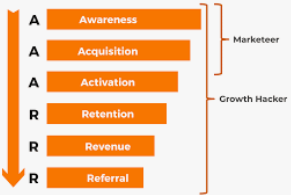

In [5]:
import pandas as pd
import plotly.graph_objects as go
import plotly.io as pio
pio.templates.default = "plotly_white"

In [3]:
#load data and see the data
data = pd.read_csv("user_data.csv")
data.head()

,user_id,stage,conversion
0,user_0,homepage,True
1,user_1,homepage,True
2,user_2,homepage,True
3,user_3,homepage,True
4,user_4,homepage,True


In [4]:
# stage column calculate
data["stage"].value_counts()

stage
homepage        10000
product_page     5000
cart             1500
checkout          450
purchase          225
Name: count, dtype: int64

In [11]:
len(data[data['stage'] == funnel_stages[0]])

10000

In [6]:
#define the Funnal Stage
funnel_stages = ['homepage', 'product_page', 'cart', 'checkout', 'purchase']
#calculate the number of users and conversions for each stage
num_users = []
num_conversions = []

for stage in funnel_stages:
    stage_users = data[data['stage'] == stage]
    num_users.append(len(stage_users))
    num_conversions.append(stage_users['conversion'].sum())

In [17]:
#Funnel Chart 
#left part is the total users, right part is the conversions
#create a funnel chart
fig = go.Figure(go.Funnel(
    y=funnel_stages,
    x=num_users,
    textposition='inside',
    textinfo='value',
    name='Total Users'
))

fig.add_trace(go.Funnel(
    y=funnel_stages,
    x=num_conversions,
    textposition='inside',
    textinfo='value',
    name='Conversions'
))

fig.update_layout(
    title='Funnel Analysis',
    funnelmode = 'stack'
)

fig.show()

In [16]:
# conversion vs no conversion inproduct_page 
data[data['stage'] == funnel_stages[1]]['conversion'].value_counts()

conversion
True     2515
False    2485
Name: count, dtype: int64

## Summary
Funnel analysis is a way to understand how users interact with a website or app. It helps businesses analyze the conversion rate from the page the user visited the website or the app to the page user left the website or the app.

A funnel analysis is a very powerful tool to help you understand where your users are dropping off on their path to conversion.